# Unit #5 Code



Name: Adam Ten Hoeve

## Problem #1

To demonstrate how interaction terms work in an ANCOVA model, let's generate some data. First, we consider the model 

$$Y_i = \beta_0 + \beta_1 X + \beta_2 Z + \beta_3XZ + \varepsilon_i$$

where $X$ is a continuous covariate, $Z$ is a dummy variable coding the levels of a two level factor, and $\varepsilon_i \overset{iid}{\sim} N(0,\sigma^2)$. We choose values for the parameters below (b0,...,b3). 

First, notice that $\beta_3 = 0$. In this case, we can think about having two separate regression lines--one for $Y$ against $X$ when the unit is in group $Z = 0$ and another for $Y$ against $X$ when the unit is in group $Z = 1$. What do we notice about the slope of each of these lines?


x,z,y
1.186784,0,3.480550
1.867505,1,9.974839
1.740442,1,9.524798
0.320845,0,1.863619
1.875672,0,4.569925
1.983290,1,10.027918


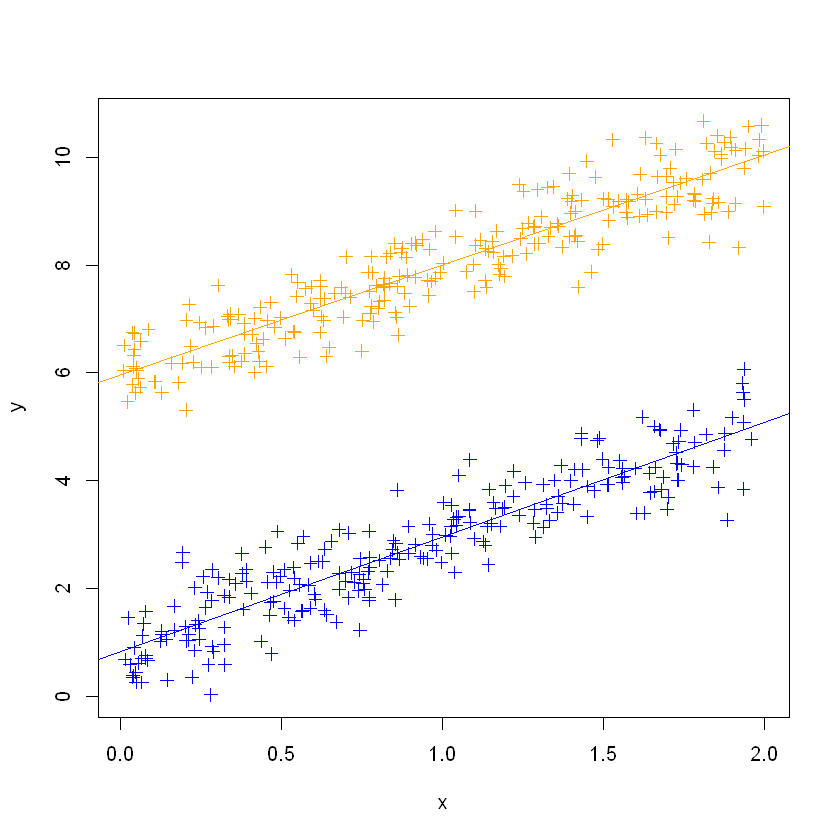

In [1]:
rm(list = ls())
set.seed(99)

#simulate data
n = 500
b0 = 1; b1 = 2; b2 = 5; b3 = 0; eps = rnorm(n, 0, 0.5);
x = runif(n, 0, 2); 
z = runif(n, -2, 2);
z = ifelse(z > 0, 1, 0)
y = b0 + b1*x + b2*z - b3*(x*z) + eps
df = data.frame(x = x, z = as.factor(z), y = y)
head(df)

# Plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("blue", "orange")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "blue")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "orange")

The slopes of the two regression lines are the same, all that changes is the intercept.

#### Now, let's add the interaction term. What happens to the slopes of each line?

x,z,y
1.186784,0,3.480550
1.867505,1,28.649886
1.740442,1,26.929216
0.320845,0,1.863619
1.875672,0,4.569925
1.983290,1,29.860822



Call:
lm(formula = y ~ x + z, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6564 -2.3662  0.0755  2.4997  5.1820 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.8917     0.2755  -14.12   <2e-16 ***
x             7.3310     0.2257   32.47   <2e-16 ***
z1           14.6199     0.2589   56.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.881 on 497 degrees of freedom
Multiple R-squared:  0.9029,	Adjusted R-squared:  0.9025 
F-statistic:  2310 on 2 and 497 DF,  p-value: < 2.2e-16



Call:
lm(formula = y[z == 0] ~ x[z == 0], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56643 -0.31784 -0.03369  0.33112  1.41799 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.83931    0.06354   13.21   <2e-16 ***
x[z == 0]    2.12084    0.05950   35.64   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5233 on 243 degrees of freedom
Multiple R-squared:  0.8394,	Adjusted R-squared:  0.8388 
F-statistic:  1270 on 1 and 243 DF,  p-value: < 2.2e-16



Call:
lm(formula = y[z == 1] ~ x[z == 1], data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55548 -0.34265  0.00753  0.35798  1.24438 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.95682    0.06254   95.24   <2e-16 ***
x[z == 1]   12.04070    0.05359  224.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4957 on 253 degrees of freedom
Multiple R-squared:  0.995,	Adjusted R-squared:  0.995 
F-statistic: 5.047e+04 on 1 and 253 DF,  p-value: < 2.2e-16



Call:
lm(formula = y ~ x + z + x * z, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56643 -0.33797 -0.00941  0.34480  1.41799 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.83931    0.06185   13.57   <2e-16 ***
x            2.12084    0.05792   36.61   <2e-16 ***
z1           5.11752    0.08920   57.37   <2e-16 ***
x:z1         9.91986    0.07993  124.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5094 on 496 degrees of freedom
Multiple R-squared:  0.997,	Adjusted R-squared:  0.997 
F-statistic: 5.439e+04 on 3 and 496 DF,  p-value: < 2.2e-16


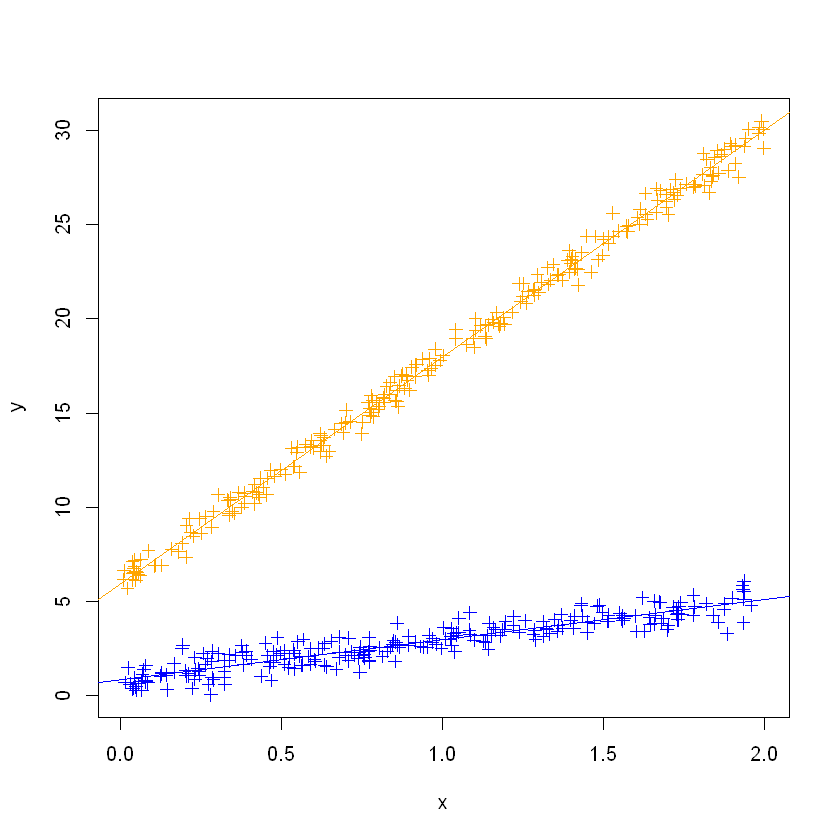

In [2]:
# To add interaction term, set b3 to something not zero. Represents the difference in slopes between the models.
# Notice that the larger the b3, the more significant the intercation. The smaller the b3, the less significant.
b3 = 10
y = b0 + b1*x + b2*z + b3*x*z + eps
df = data.frame(x = x, z = as.factor(z), y = y)
head(df)

lmod = lm(y ~ x + z, data = df)
lmodz0 = lm(y[z == 0] ~ x[z == 0], data = df)
lmodz1 = lm(y[z == 1] ~ x[z == 1], data = df)
lmodInter = lm(y ~ x + z + x*z, data = df)
summary(lmod)
summary(lmodz0)
summary(lmodz1)
summary(lmodInter)

# Plot separate regression lines
with(df, plot(x,y, pch = 3, col = c("blue", "orange")[z]))
abline(coef(lm(y[z == 0] ~ x[z == 0], data = df)), col = "blue")
abline(coef(lm(y[z == 1] ~ x[z == 1], data = df)), col = "orange")

## Problem #2

Load the mtcars dataset. The goal if this question will be to try to explain the variability in miles per gallon (mpg) using transmission type (am), while adjusting for horsepower (hp).

#### (a) Rename the levels of am from 0 and 1 to "Automatic" and "Manual" (one option for this is to use the revalue() function in the plyr package). Then, create a boxplot of mpg against am. What do you notice? What is the difference in the mean of mpg for cars in the Automatic group vs the Manual group?

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.1     v dplyr   0.7.4
v tidyr   0.7.2     v stringr 1.2.0
v readr   1.1.1     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact



[1] 7.244939

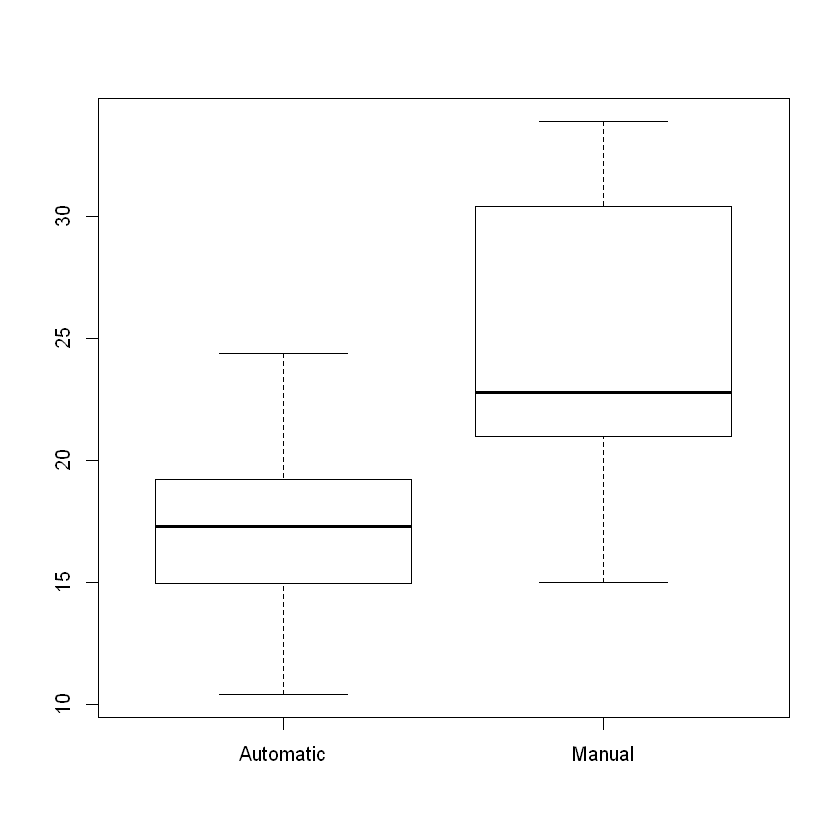

In [3]:
library(tidyverse)
library(plyr)
data(mtcars)
# head(mtcars)
mtcars$amf = as.factor(mtcars$am)
mtcars$amf = with(mtcars, revalue(amf, c("0" = "Automatic", "1" = "Manual")))
with(mtcars, boxplot(mpg ~ amf), xlab = "Transmission Type", ylab = "MPG")
with(mtcars, mean(mpg[amf == "Manual"]) - mean(mpg[amf == "Automatic"]))

We can notice that the manual has a higher min, max, mean and quartile values than the Automatic values. The difference in means is about 5mpg.

#### (b) Construct three models: 

1. An ANOVA model that checks for differences in mean mpg across different transmission types. 
2. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower.
3. An ANCOVA model that checks for differences in mean mpg across different transmission types, adjusting for horsepower and for interaction effects between horsepower and transmission type.

In [5]:
anov = lm(mpg ~ amf, data = mtcars)
summary(anov)

anc = lm(mpg ~ hp + amf, data = mtcars)
summary(anc)

ancInt = lm(mpg ~  hp + amf + am:hp, data = mtcars)
summary(ancInt)


Call:
lm(formula = mpg ~ amf, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3923 -3.0923 -0.2974  3.2439  9.5077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   17.147      1.125  15.247 1.13e-15 ***
amfManual      7.245      1.764   4.106 0.000285 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.902 on 30 degrees of freedom
Multiple R-squared:  0.3598,	Adjusted R-squared:  0.3385 
F-statistic: 16.86 on 1 and 30 DF,  p-value: 0.000285



Call:
lm(formula = mpg ~ hp + amf, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3843 -2.2642  0.1366  1.6968  5.8657 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.584914   1.425094  18.655  < 2e-16 ***
hp          -0.058888   0.007857  -7.495 2.92e-08 ***
amfManual    5.277085   1.079541   4.888 3.46e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.909 on 29 degrees of freedom
Multiple R-squared:  0.782,	Adjusted R-squared:  0.767 
F-statistic: 52.02 on 2 and 29 DF,  p-value: 2.55e-10



Call:
lm(formula = mpg ~ hp + amf + am:hp, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3818 -2.2696  0.1344  1.7058  5.8752 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.6248479  2.1829432  12.197 1.01e-12 ***
hp          -0.0591370  0.0129449  -4.568 9.02e-05 ***
amfManual    5.2176534  2.6650931   1.958   0.0603 .  
hp:am        0.0004029  0.0164602   0.024   0.9806    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.961 on 28 degrees of freedom
Multiple R-squared:  0.782,	Adjusted R-squared:  0.7587 
F-statistic: 33.49 on 3 and 28 DF,  p-value: 2.112e-09


#### Is the interaction term significant?

The interaction term is not significant because the p-value is very high (0.9806).

#### (c) Construct a plot of mpg against horsepower, and color points based in transmission type. Then, overlay the regression lines with the interaction term, and the lines without. How are these lines consistent with your answer in (b)?

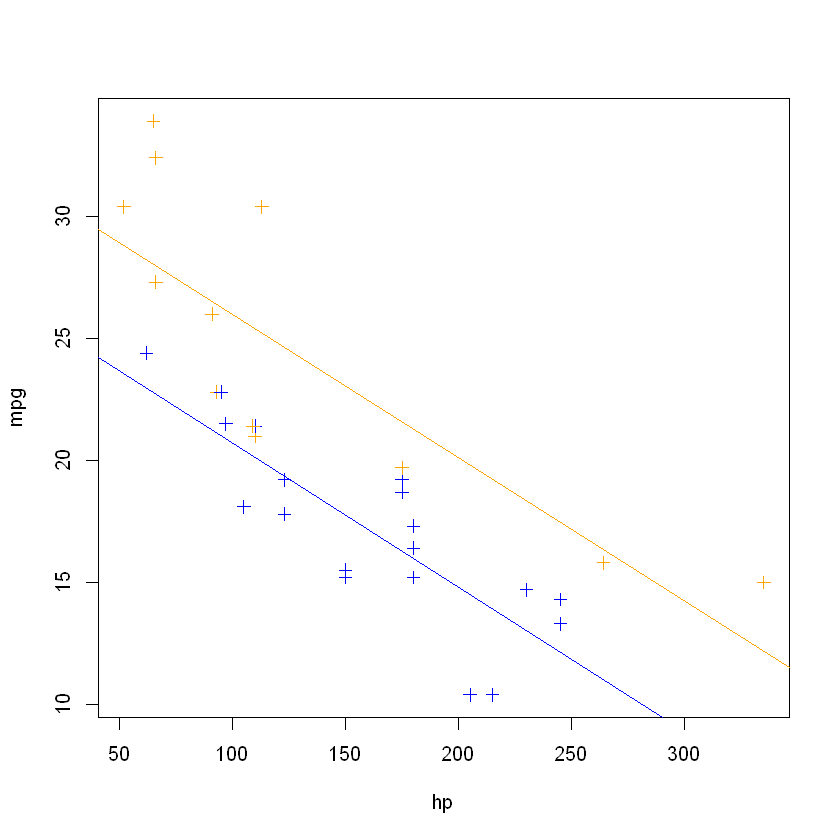

hp 
-0.05873409

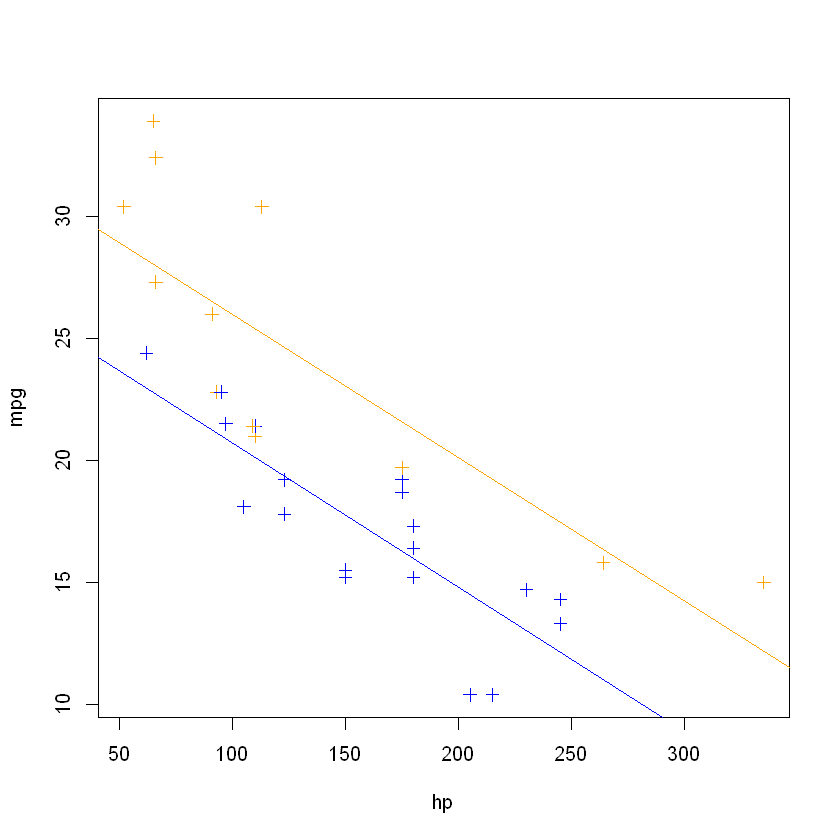

In [6]:
#plot separate regression lines
with(mtcars, plot(hp,mpg, pch = 3, col = c("blue","orange")[amf]))
abline(coef(lm(mpg[am == 0] ~ hp[am == 0], data = mtcars)), col = "blue")
abline(coef(lm(mpg[am == 1] ~ hp[am == 1], data = mtcars)), col = "orange")

with(mtcars, plot(hp,mpg, pch = 3, col = c("blue","orange")[amf]))
abline(coef(lm(mpg[am == 0] ~ hp[am == 0], data = mtcars)), col = "blue")
with(mtcars, abline(coef(ancInt)[1] + coef(ancInt)[3], 
                    coef(ancInt)[2] + coef(ancInt)[4], col = "orange"))
coef(ancInt)[2] + coef(ancInt)[4]

For the plots, we can see that the slopes of both lines, for both types of transmissions, are about the same. This means that the interaction between the two variables is likely insignificant, which agrees with our conclusions from part (b).